# Lab2 part2 2020.02

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock
import math
import pandas as pd

In [2]:

class SOM():
    
    def __init__(self, patterns=84, output_nodes=100, eta=0.2):
        self.eta = eta
        self.patterns = patterns
        self.output_nodes = output_nodes
        self.weights = None
    
    def Euclidean(self, x, y):
        return np.sum(np.square(x-y),axis=1)
        
    def fit(self,X):  
        np.random.seed(400)
        self.weights = np.random.rand(self.output_nodes, self.patterns)
        epochs = 20
        for epoch in range(epochs):
            neighbourhood_size = (50 - round(2.5 * epoch))
            for sample in X:
                dist = self.Euclidean(sample, self.weights)
                winner = np.argmin(dist)
                if winner < neighbourhood_size:
                    idx = np.arange(0,neighbourhood_size)
                else:
                    idx = np.arange(winner-neighbourhood_size,winner)
                self.weights[idx,:] +=  self.eta * (sample - self.weights[idx,:])
    
    def mapping(self,X,labels):
        order = []
        for ind,sample in enumerate(X):
            dist = self.Euclidean(sample, self.weights)
            winner = np.argmin(dist)
            order.append(winner)
           # print(order)
     
        index = np.argsort(order)
        for i in index:
            print(order[i],labels[i])


In [3]:
animal_data = np.loadtxt('data_lab2/animals.dat', delimiter = ',', dtype = int)
animalNames = np.loadtxt('data_lab2/animalnames.txt', dtype = str)

In [4]:
animal_data = np.reshape(animal_data, (32,84))

In [5]:
animalNames

array(["'antelop'", "'ape'", "'bat'", "'bear'", "'beetle'", "'butterfly'",
       "'camel'", "'cat'", "'crocodile'", "'dog'", "'dragonfly'",
       "'duck'", "'elephant'", "'frog'", "'giraffe'", "'grasshopper'",
       "'horse'", "'housefly'", "'hyena'", "'kangaroo'", "'lion'",
       "'moskito'", "'ostrich'", "'pelican'", "'penguin'", "'pig'",
       "'rabbit'", "'rat'", "'seaturtle'", "'skunk'", "'spider'",
       "'walrus'"], dtype='<U13')

In [6]:
som = SOM(84, 100)
som.fit(animal_data)
mapping = som.mapping(animal_data, animalNames)

0 'grasshopper'
0 'moskito'
0 'dragonfly'
0 'beetle'
0 'butterfly'
0 'housefly'
1 'duck'
1 'pelican'
2 'ostrich'
2 'penguin'
3 'spider'
5 'seaturtle'
5 'crocodile'
6 'frog'
9 'giraffe'
10 'camel'
11 'pig'
11 'horse'
14 'kangaroo'
17 'antelop'
20 'ape'
22 'lion'
23 'bear'
24 'dog'
25 'cat'
28 'rat'
29 'rabbit'
31 'bat'
32 'elephant'
36 'skunk'
36 'hyena'
43 'walrus'


In [7]:
### Cyclic Tour

In [8]:
class SOM_CT():
    
    def __init__(self, patterns=2, output_nodes=10, eta=0.1):
        self.eta = eta
        self.patterns = patterns
        self.output_nodes = output_nodes
        self.weights = None
    
    def Euclidean(self, x, y):
        return np.sum(np.square(x-y),axis=1)
        
    def fit(self,X):  
        np.random.seed(200)
        self.weights = np.random.rand(self.output_nodes, self.patterns)
        #print(self.weights)
        epochs = 20
        maxSize = 2
        for epoch in range(epochs):
            nb_size = round(maxSize - maxSize * epoch / (epochs - 1))
            neighbours = []
            n = self.output_nodes
            
            for sample in X:
                dist = self.Euclidean(sample, self.weights)
                #print(dist)
                winner = np.argmin(dist)
                '''
                for i in range(n):
                    if abs(i - winner) <= nb_size or abs(i - winner - n) < nb_size or abs(i - winner + n) < nb_size:
                        neighbours.append(i)
                '''
                diff = int(nb_size/2)
                weight_length = self.weights.shape[0]
                
                lower = (winner - diff) % weight_length
                upper = (winner + diff) % weight_length
                if lower > upper:
                    lower_range = list(range(lower,weight_length))
                    upper_range = list(range(0,upper+1))
                    neighbours = lower_range.append(upper_range)
                else:
                    neighbours = range(lower,upper+1)
                    
                idx = neighbours
                self.weights[idx,:] +=  self.eta * (sample - self.weights[idx,:])
       #print(self.weights)
            
    def mapping(self,X,labels):
        predictions = []
        for sample in X:
            dist = self.Euclidean(sample, self.weights)
            winner = np.argmin(dist)
            predictions.append(winner)
            
        predictions = np.asarray(predictions)
        args = np.argsort(predictions)
       
        plt.scatter(X[:,0],X[:,1])
        x = []
        y = []
        tourX = []
        tourY = []
        for i in args:
            x.append(X[i][0])
            y.append(X[i][1])
            tourX.append(self.weights[i][0])
            tourY.append(self.weights[i][1])
        plt.plot(x, y, color='red')
        #plt.plot(tourX, tourY, '-o', color='g')
        plt.title('Cyclic tour')
  
        return args

In [9]:
with open('data_lab2/cities.dat') as f:
    lines = f.readlines()[4:]
    raw_data = [line.replace(";", '').replace('\n', '').split(",") for line in lines]
    data = np.array([ elem for singleList in raw_data for elem in singleList])
    data = np.reshape(data, (10,2))
    data = data.astype(np.float)
X = data

In [204]:
X

array([[0.4   , 0.4439],
       [0.2439, 0.1463],
       [0.1707, 0.2293],
       [0.2293, 0.761 ],
       [0.5171, 0.9414],
       [0.8732, 0.6536],
       [0.6878, 0.5219],
       [0.8488, 0.3609],
       [0.6683, 0.2536],
       [0.6195, 0.2634]])

In [208]:
cities_labels = np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

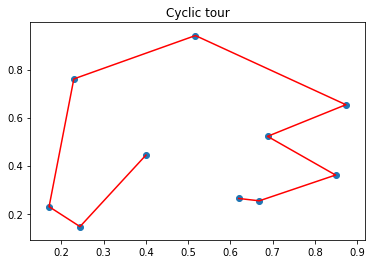

In [209]:
ctour = SOM_CT(patterns=2, output_nodes=10, eta=0.1)
ctour.fit(X)
ctour.mapping(X,cities_labels)


In [10]:

class SOM_Votes():
    
    def __init__(self, patterns=31, output_nodes=100, eta=0.01):
        self.eta = eta
        self.patterns = patterns
        self.output_nodes = output_nodes
        self.weights = None

    
    def Manhatten(self, x, y):
        return np.sum(np.square(x-y),axis=1)
        
    def fit(self,X):  
        np.random.seed(200)
        self.weights = np.random.rand(self.output_nodes, self.patterns)
        #print(self.weights)
        epochs = 20
        maxSize = 
        for epoch in range(epochs):
            nb_size = round(maxSize - maxSize * epoch / (epochs - 1))
            neighbours = []
            n = self.output_nodes
            
            for sample in X:
                dist = self.Manhatten(sample, self.weights)
                #print(dist)
                winner = np.argmin(dist)
                grid_winner = np.array([math.floor(winner/10), winner % 10])

                for i in range(100):
                    i_grid = np.array([math.floor(i/10), i % 10])
                    if cityblock(grid_winner, i_grid) <= nb_size:
                        neighbours.append(i)
                        
                idx = neighbours
                self.weights[idx,:] +=  self.eta * (sample - self.weights[idx,:])
       #print(self.weights)
            
    def mapping(self,X,labels):
        predictions = []
        #predictions = np.zeros((349,))
        for sample in X:
            dist = self.Manhatten(sample, self.weights)
            winner = np.argmin(dist)
            predictions.append(winner)

        predictions = np.asarray(predictions, 'int')
        mymap = predictions
        args = np.argsort(predictions)
        return (mymap, args)


In [211]:
votes = np.loadtxt('data_lab2/votes.dat', delimiter = ',', dtype = float)
votes = np.reshape(votes,(349,31))
votes_labels = list(range(len(votes)))
X = votes

In [212]:
file = open('data_lab2/mpnames.txt', encoding = 'ISO-8859-1')
myname = np.array(file.read().split('\n')[:-1])



In [213]:
file = open('data_lab2/mpdistrict.dat', 'r')
rawData = file.readlines()
district = []
for i in range(len(rawData)):
    district.append(int(rawData[i]))

file = open('data_lab2/mpparty.dat', 'r')
rawData = file.readlines()
party = []
for i in range(len(rawData)):
    party.append((rawData[i]))

myparty = []
for i in party[3:]:
    myparty.append (int(i.strip()))    


file = open('data_lab2/mpsex.dat', 'r')
rawData = file.readlines()
sex = []
for i in range(len(rawData)):
    sex.append((rawData[i]))
s = []
for i in sex[2:]:
    s.append (int(i.strip()))


In [214]:

som_v = SOM_Votes(patterns=31, output_nodes=100, eta=0.1)
som_v.fit(X)
mymap,index = som_v.mapping(X,votes_labels)

In [215]:
mymap

array([84, 84, 84, 84, 53, 84, 94, 53, 53, 84, 84, 53, 53, 84, 94, 84, 94,
       84, 53, 84, 53, 84, 53, 84, 53, 84, 53, 84, 53, 69, 84, 94, 94, 53,
       84, 84, 84, 84, 84, 84, 53, 53, 53, 53, 62, 53, 84, 84, 84, 53, 53,
       84, 84, 53, 94, 53, 84, 84, 84, 94, 84, 84, 84, 84, 53, 84, 84, 53,
       84, 94, 84, 53, 84, 53, 53, 84, 94, 53, 84, 84, 84, 53, 53, 53, 53,
       84, 53, 53, 94, 84, 84, 84, 53, 94, 53, 53, 53, 84, 84, 84, 53, 84,
       84, 84, 53, 53, 53, 84, 84, 84, 84, 53, 53, 75, 53, 84, 53, 84, 53,
       84, 84, 84, 84, 94, 53, 94, 84, 84, 84, 84, 53, 84, 94, 53, 53, 53,
       84, 53, 53, 53, 53, 84, 84, 84, 53, 53, 53, 53, 53, 94, 53, 84, 84,
       84, 94, 84, 84, 53, 53, 94, 53, 84, 84, 84, 53, 53, 84, 53, 84, 84,
       53, 84, 84, 84, 84, 84, 53, 84, 84, 84, 53, 94, 53, 84, 53, 84, 84,
       53, 53, 53, 53, 53, 53, 84, 94, 84, 84, 84, 84, 84, 53, 84, 94, 53,
       84, 53, 84, 84, 94, 84, 84, 53, 84, 53, 53, 53, 84, 84, 53, 94, 84,
       84, 92, 84, 84, 53

In [64]:
s = np.array(s)
sexmap = s[index]
sexmap = np.reshape(sexmap,(349,))
sexmap 

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,